## TASK 5 : Sales prediction using python

In [1]:
import pandas as pd
import numpy as np

In [2]:
with open("C:\Program Files\Datasets\Advertising.csv") as f:
    print(f)

<_io.TextIOWrapper name='C:\\Program Files\\Datasets\\Advertising.csv' mode='r' encoding='cp1252'>


In [3]:
path="C:\Program Files\Datasets\Advertising.csv"
df = pd.read_csv(path,index_col=0)

### <i> Dataset

In [4]:
df

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [5]:
X= df.drop("Sales",axis=1)
y = df["Sales"]

### <i> Splitting data

In [6]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=42)

### <i> Model fitting

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(Xtrain,ytrain)

### <i> Predictions & Original values

In [13]:
ypred= model.predict(Xtest)
ypred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [8]:
ytest.to_numpy()

array([16.9, 22.4, 21.4,  7.3, 24.7, 12.6, 22.3,  8.4, 11.5, 14.9,  9.5,
        8.7, 11.9,  5.3, 10.3, 11.7,  5.5, 16.6, 11.3, 18.9, 19.7, 12.5,
       10.9, 22.2,  9.3,  8.1, 21.7, 13.4, 10.6,  5.7, 10.6, 11.3, 23.7,
        8.7, 16.1, 20.7, 11.6, 20.8, 11.9,  6.9])

### <i> Accuracy Measures

In [45]:
model.score(Xtest,ytest)

0.899438024100912

In [48]:
coef = model.coef_[0]
intercept = model.intercept_

print("Coefficients:", coef)
print("Intercept:", intercept)

Coefficients: 0.044729517468716326
Intercept: 2.979067338122629


### <i> Visualization

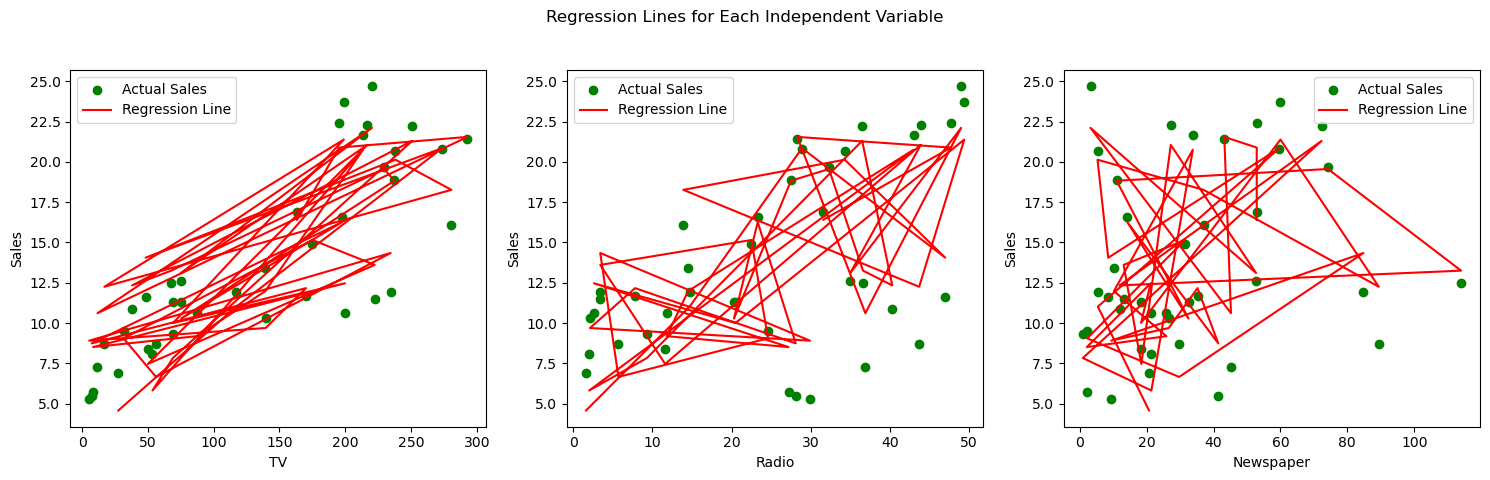

In [20]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, column in enumerate(X.columns):
    axs[i].scatter(Xtest[column], ytest, color='green', label='Actual Sales')
    axs[i].plot(Xtest[column], ypred, color='red', label='Regression Line')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Sales')
    axs[i].legend()

plt.suptitle('Regression Lines for Each Independent Variable')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### <font color="brown"> Conclusion : The model performs well for given data but it seems to overfit the data a bit due to lack of features and small size of the data.It will provide more accurate results if more features are provided. Overfitting can also be avoided by various methods like Regularization or Ensembling.